In [3]:
# Import dependencies

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
clean_data_df = pd.read_csv('./clean_data/clean_data.csv')

clean_data_df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11
2,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11
3,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11
4,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
457726,2020/11/14,--,2020/11/10,Laboratory-confirmed case,0.0,30 - 39 Years,Hispanic,0.0,0.0,0.0,0.0,11
457727,2020/06/22,--,--,Laboratory-confirmed case,0.0,30 - 39 Years,Hispanic,0.0,0.0,0.0,1.0,6
457728,2020/05/31,--,2020/05/31,Laboratory-confirmed case,0.0,30 - 39 Years,Hispanic,0.0,0.0,0.0,1.0,5
457729,2020/06/05,--,2020/05/03,Probable Case,0.0,30 - 39 Years,Hispanic,0.0,0.0,0.0,0.0,6


In [5]:
# Calculate the distribution of female versus male COVID-19 Cases
total_cases= len(clean_data_df['sex'])

by_gender_count=clean_data_df["sex"].value_counts()

by_gender_pct = (100*(by_gender_count/total_cases)).round(2)

# Calculate the distribution of female versus male death by COVID-19
death = clean_data_df[(clean_data_df['death_yn'] == 1.0)]
total_death = len(death['death_yn'])
by_gender_death=death["sex"].value_counts()
by_gender_death_pct = (100*(by_gender_death/total_death)).round(2)


# Calculate the distribution of female versus male death with underlying medical condition by COVID-19
death_med_cond = death[(death['medcond_yn'] == 1.0)]
total_death_med_cond = len(death_med_cond['medcond_yn'])
by_gender_death_med_cond = death_med_cond["sex"].value_counts()
by_gender_death_med_cond_pct = (100*(by_gender_death_med_cond/total_death_med_cond)).round(2)

# Assemble the resulting series into a single summary dataframe.
gender_df = pd.DataFrame({"Gender": ["Female", "Male"],
                          "Total Cases": by_gender_count,
                          "% Cases": by_gender_pct,
                          "Death Count":by_gender_death,
                          "% Death by Gender":by_gender_death_pct,
                          "Total Death with Medical Cond.": by_gender_death_med_cond,
                          "% Death with Medical Cond. by Gender":by_gender_death_med_cond_pct })

gender_df

,Gender,Total Cases,% Cases,Death Count,% Death by Gender,Total Death with Medical Cond.,% Death with Medical Cond. by Gender
0.0,Female,243408,53.18,12396,42.5,11683,42.49
1.0,Male,214323,46.82,16773,57.5,15815,57.51


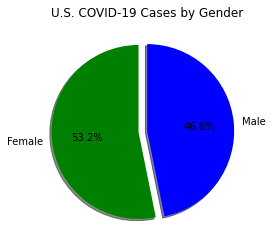

In [6]:
# Pie plot showing the distribution of male versus female COVID-19 Cases

# Create Labels for the sections of the pie
labels = gender_df["Gender"]
distribution = gender_df["% Cases"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['green', 'blue'],explode = (0.1, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 Cases by Gender")

plt.show()

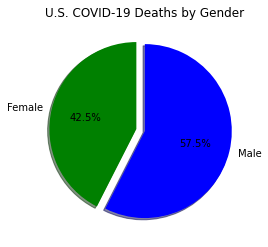

In [7]:
# Pie plot showing the distribution of male versus female deaths by COVID-19 Cases

# Create Labels for the sections of the pie
labels = gender_df["Gender"]
distribution = gender_df["% Death by Gender"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['green', 'blue'],explode = (0.1, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 Deaths by Gender")

plt.show()

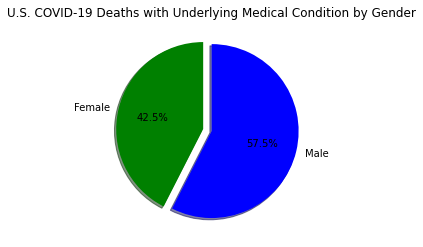

In [8]:
# Pie plot showing the distribution of male versus female deaths by COVID-19 Cases with underlying medical condition

# Create Labels for the sections of the pie
labels = gender_df["Gender"]
distribution = gender_df["% Death with Medical Cond. by Gender"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['green', 'blue'],explode = (0.1, 0), autopct="%1.1f%%",shadow=True, startangle=90 )

#Formatting
plt.title("U.S. COVID-19 Deaths with Underlying Medical Condition by Gender")

plt.show()